# Lab 4 - Comparison of Classifiers - 13132911

## A. Preparation

### Import

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from scipy import interp

# used below to scale all predictor values to the range [0, 1]
# this is done separately for each fold in cross validation
min_max_scaler = preprocessing.MinMaxScaler()

# Functions
%run ./Lab4_Functions.ipynb

### Loading and Preparing Data

In [2]:
df = pd.read_csv("./loans_exercise4.csv")
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,2378,0.0,46,360,1,0,0
1,0,0,0,1,0,5000,2541.0,151,480,1,0,0
2,0,0,0,1,0,10000,1666.0,225,360,1,0,0
3,1,0,0,1,0,6500,0.0,105,360,0,0,0
4,1,0,0,1,0,1853,2840.0,114,360,1,0,0


In [3]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [4]:
# target attribute
target = df['Loan_Status']

# predictor attributes
predictors = df.drop('Loan_Status', axis=1).values

# prepare array of false-positive rate values
mean_fpr = np.linspace(start=0, stop=1, num=100)

## B. Evaluation and Comparison of Classifiers

### Train SVM Classifier

In [5]:
# Create an SVM SV[C]lassifier object as a probabilistic classifier with default parameters
# gamma = 'auto' because I got a bunch of annoying FutureWarnings
SVM_classifier = svm.SVC(probability=True, gamma='auto')

# Train and evaluate the classifier by applying 5-fold cross validation.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM, precs_SVM, recs_SVM = evaluate_classifier(folds=5, 
                                                                        p=predictors, t=target, 
                                                                        classifier=SVM_classifier, 
                                                                        mean_fpr=mean_fpr)
# accuracies - an array of accuracies for each fold
# f1_scores - an array of F1-scores (also known as F-scores) for each fold
# tprs - true positive rates, one per cross-validation fold
# aucs - areas below the ROC curve, one per cross-validation fold

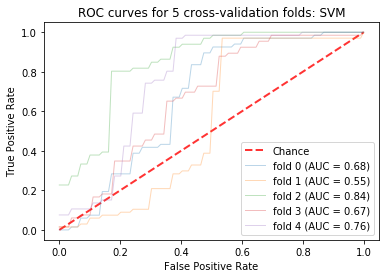

In [6]:
# Plot an ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

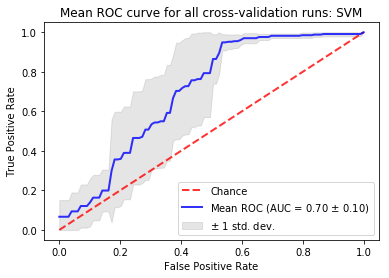

In [7]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Train Naïve Bayes Classifier

In [8]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

# Train and evaluate the classifier by applying 5-fold cross validation.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB, precs_NB, recs_NB = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NB_classifier, 
                                                                    mean_fpr=mean_fpr)
# accuracies - an array of accuracies for each fold
# f1_scores - an array of F1-scores (also known as F-scores) for each fold
# tprs - true positive rates, one per cross-validation fold
# aucs - areas below the ROC curve, one per cross-validation fold

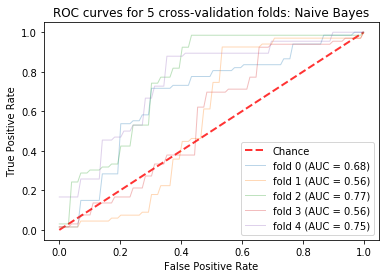

In [9]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

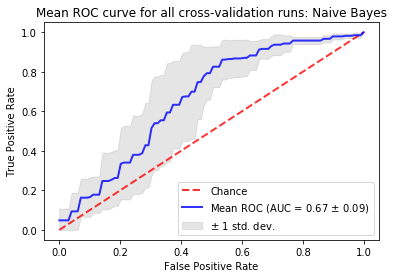

In [10]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

### Neural Net (mine)

In [11]:
NN_classifier = MLPClassifier(alpha=1, max_iter=1000)

accuracies_NN, f1_scores_NN, tprs_NN, aucs_NN, precs_NN, recs_NN = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NN_classifier, 
                                                                    mean_fpr=mean_fpr)

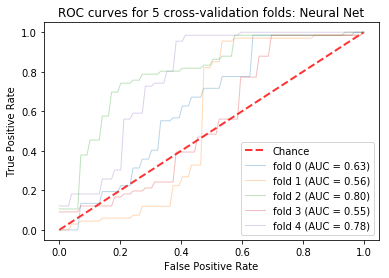

In [12]:
plot_roc_cv_folds(mean_fpr, tprs_NN, aucs_NN, 'Neural Net')

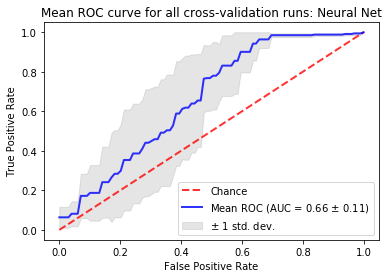

In [13]:
plot_roc_mean(mean_fpr, tprs_NN, aucs_NN, 'Neural Net')

## Compare Classifiers

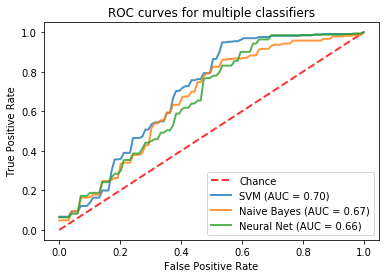

In [14]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_NN, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_NN)]),
                              np.array(['SVM', 'Naive Bayes', 'Neural Net']))

In [15]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB, 'Neural Net' : accuracies_NN})
accuracies_df.describe()

,SVM,Naive Bayes,Neural Net
count,5.000000,5.000000,5.000000
mean,0.808403,0.602480,0.802218
std,0.029567,0.133556,0.031181
min,0.778947,0.381443,0.778947
25%,0.783505,0.610526,0.783505
50%,0.812500,0.621053,0.783505
75%,0.814433,0.659794,0.812500
max,0.852632,0.739583,0.852632


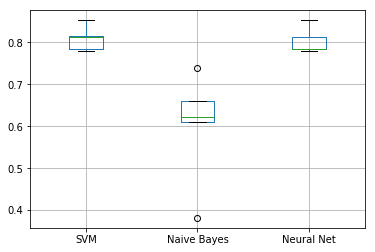

In [16]:
accuracies_df.boxplot()

In [17]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB, 'Neural Net' : f1_scores_NN})
f1_scores_df.describe()

,SVM,Naive Bayes,Neural Net
count,5.000000,5.000000,5.000000
mean,0.876278,0.644063,0.871637
std,0.017193,0.215958,0.019466
min,0.860927,0.268293,0.855172
25%,0.860927,0.666667,0.860927
50%,0.878378,0.727273,0.860927
75%,0.878378,0.751880,0.878378
max,0.902778,0.806202,0.902778


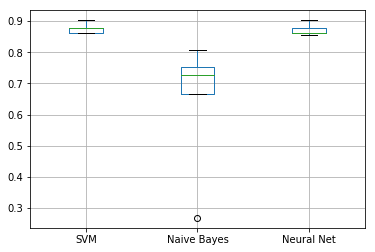

In [18]:
f1_scores_df.boxplot()

## Precision & Recall
These are now returned by the `evaluate_classifier` function in the Lab4_Functions.ipynb file, as seen by my use of said function above

In [19]:
# Precision
precs_df = pd.DataFrame(data={'SVM' : precs_SVM, 'Naive Bayes' : precs_NB, 'Neural Net' : precs_NN})
precs_df.describe()

,SVM,Naive Bayes,Neural Net
count,5.000000,5.000000,5.000000
mean,0.845790,0.600955,0.831215
std,0.029377,0.067739,0.046716
min,0.809982,0.525203,0.765857
25%,0.832353,0.553292,0.809982
50%,0.838735,0.604594,0.832353
75%,0.860627,0.621111,0.860627
max,0.887255,0.700577,0.887255


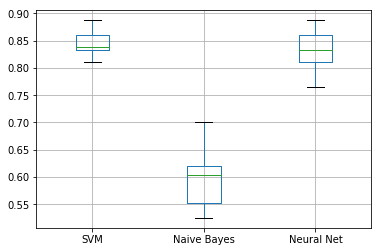

In [20]:
precs_df.boxplot()

In [21]:
# Recall
recs_df = pd.DataFrame(data={'SVM' : recs_SVM, 'Naive Bayes' : recs_NB, 'Neural Net' : recs_NN})
recs_df.describe()

,SVM,Naive Bayes,Neural Net
count,6.000000,6.000000,6.000000
mean,0.832873,0.607858,0.820727
std,0.041128,0.062903,0.049050
min,0.768286,0.525203,0.765857
25%,0.815574,0.566117,0.778710
50%,0.835544,0.612853,0.821167
75%,0.855154,0.637057,0.853559
max,0.887255,0.700577,0.887255


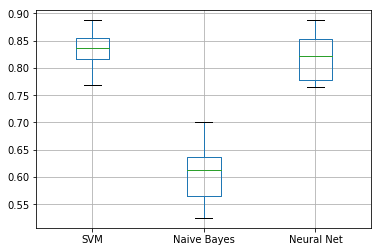

In [22]:
recs_df.boxplot()

## Conclusion
SVM has the highest accuracy of the three, far ahead of Naive Bayes but close with the Neural Net. However, it does have a slightly lower standard deviation on accuracy and it's AUC also stands out as the best (where Naive Bayes and Neural Net are actually tied).

It's a similar case for F-scores, where SVM just edges ahead of the Neural Net, both of which significantly beat Naive Bayes. Again the SVM standard deviation is slightly lower than the Neural Net's.

Precision scores followed the same pattern: SVM marginally better than Neural Net in mean and standard deviation, Naive Bayes clearly the worst option of the three.

It was close between the top two, but overall SVM still stood out as the most best model.

## Predict Some Values
As SVM was chosen, I ran through a few predictions to play around

In [23]:
predictors = min_max_scaler.fit_transform(predictors) 
model = SVM_classifier.fit(predictors, target)

# Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome,
# LoanAmount, Loan_Amount_Term, Credit_History, Property_Area

# 3 arrays of 11 random numbers between 0 and 1
new_loans = np.random.rand(4, 11)

# Probabilistic prediction
print(np.round(model.predict_proba(new_loans), 2))

# Exact prediction
print(model.predict(new_loans))

[[0.56 0.44]
 [0.66 0.34]
 [0.61 0.39]
 [0.22 0.78]]
[1 0 0 1]
